<a href="https://colab.research.google.com/github/upadhyaypuja/upadhyaypuja/blob/main/Play_Store_App_Review_Analysis_PujaBharti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
# Explore and analyze the data to discover key factors responsible for app engagement and success.

# Here we are going to analyze the data of play store apps,we are havng two dataset i,e play store apps dataset and user reviews dataset.we are going to use some libraries of python to analyze our dataset.

In [4]:
#importing some important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool


# Let's mount our google drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path1="/content/drive/MyDrive/Play Store App Review Analysis/Play Store Data.csv"

In [7]:
file_path2="/content/drive/MyDrive/Play Store App Review Analysis/User Reviews.csv"

In [8]:
#creating dataframe
plstr_df=pd.read_csv(file_path1)
usr_df=pd.read_csv(file_path2)

# *Let's analyse the data of Play Store App review *

In [9]:
#Get the shape of data in rows and columns
plstr_df.shape

(10841, 13)

In [10]:
#print first five rows of play store apps data
plstr_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
#print the last five rows of play store apps data
plstr_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [12]:
#print all the information of Play Store apps data
plstr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [13]:
#print all the descriptive values of data
plstr_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [14]:
#print all the columns in our data
plstr_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Data Cleaning of plstr_df

In [15]:
plstr_df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

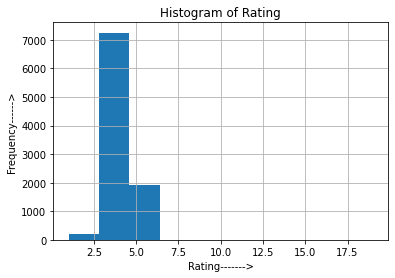

In [16]:
plstr_df.hist('Rating');
plt.xlabel('Rating------->')
plt.ylabel('Frequency------>')
plt.title('Histogram of Rating');

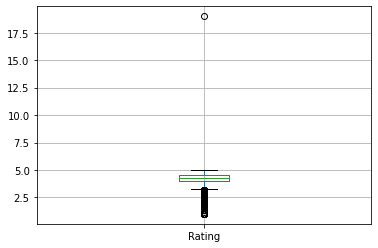

In [17]:
plstr_df.boxplot('Rating');

In [18]:
#checking outliers
plstr_df[plstr_df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [19]:
#fixing mixmatched values
plstr_df.loc[10472] = plstr_df.loc[10472].shift()
plstr_df['App'].loc[10472] = plstr_df['Category'].loc[10472]
plstr_df['Category'].loc[10472] = np.nan
plstr_df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [20]:
#checking the null values
plstr_df.isnull().sum()
plstr_df.dropna(inplace=True)

In [21]:
plstr_df.drop_duplicates(inplace=True)
plstr_df.shape

(8886, 13)

In [22]:
plstr_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [23]:
plstr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             8886 non-null   object
 1   Category        8886 non-null   object
 2   Rating          8886 non-null   object
 3   Reviews         8886 non-null   object
 4   Size            8886 non-null   object
 5   Installs        8886 non-null   object
 6   Type            8886 non-null   object
 7   Price           8886 non-null   object
 8   Content Rating  8886 non-null   object
 9   Genres          8886 non-null   object
 10  Last Updated    8886 non-null   object
 11  Current Ver     8886 non-null   object
 12  Android Ver     8886 non-null   object
dtypes: object(13)
memory usage: 971.9+ KB


In [24]:
#Here we can see  Reviews, Size, Installs, & price  have object datatype, But it should be int or float datatype, 
#So let’s convert them to their respective correct type. 

In [25]:
#Reviews is object type, converting into int type
plstr_df['Reviews'] = plstr_df.Reviews.astype('int64')
plstr_df['Reviews'].dtype

dtype('int64')

In [26]:
#Size is object type, converting into float type
plstr_df['Size'] = plstr_df.Size.str.replace("M","000")
plstr_df['Size'] = plstr_df.Size.replace("Varies with device",np.nan)
plstr_df['Size'] = plstr_df.Size.replace("1,000+",1000)
plstr_df['Size'] = plstr_df.Size.str.replace("k","")
plstr_df['Size'] =plstr_df['Size'].astype(float)
plstr_df['Size'].dtype

dtype('float64')

In [27]:
#Installs is object type, converting into float type
plstr_df['Installs'] = plstr_df['Installs'].apply(lambda x : str(x).replace(",","") if "," in str(x) else str(x))
plstr_df['Installs'] = plstr_df['Installs'].apply(lambda x : str(x).replace("+","") if "+" in str(x) else str(x))
plstr_df['Installs'] = plstr_df['Installs'].apply(lambda x : float(x))
plstr_df['Installs'].dtype

dtype('float64')

In [28]:
#Price is object type, converting into float type
plstr_df['Price'] = plstr_df['Price'].apply(lambda x : str(x).replace('$','')if '$' in str(x) else str(x))
plstr_df['Price'] = plstr_df['Price'].apply(lambda x : float(x))
plstr_df['Price'].dtype

dtype('float64')

In [29]:
#last update is object type,converting into datetype
plstr_df['Last Updated'] = pd.to_datetime(plstr_df['Last Updated'])
plstr_df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10834   2017-06-18
10836   2017-07-25
10837   2018-07-06
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 8886, dtype: datetime64[ns]

In [30]:
plstr_df.describe()

,Reviews,Size,Installs,Price
count,8.886000e+03,7418.000000,8.886000e+03,8886.000000
mean,4.730928e+05,20863.873578,1.650061e+07,0.963526
std,2.906007e+06,24909.471071,8.640413e+07,16.194792
min,1.000000e+00,1.000000,1.000000e+00,0.000000
25%,1.640000e+02,5.900000,1.000000e+04,0.000000
50%,4.723000e+03,14000.000000,5.000000e+05,0.000000
75%,7.131325e+04,33000.000000,5.000000e+06,0.000000
max,7.815831e+07,100000.000000,1.000000e+09,400.000000


# let's analyze the data of user reviews :

In [31]:
#Get the shape of user reviews data
usr_df.shape

(64295, 5)

In [32]:
#Get the first 5 rows of user reviews data
usr_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [33]:
#Get the last five rows of user reviews data
usr_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [34]:
#Get the all information about user reviews data
usr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [35]:
#get all the null values in each column 
usr_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [36]:
usr_df.dropna(inplace=True)
usr_df.drop_duplicates(inplace=True)

In [37]:
usr_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [38]:
usr_df.shape

(29692, 5)

In [39]:
usr_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,29692.000000,29692.000000
mean,0.188868,0.490930
std,0.355694,0.265976
min,-1.000000,0.000000
25%,0.000000,0.350000
50%,0.157143,0.514286
75%,0.422917,0.652703
max,1.000000,1.000000


# DATA VISUALIZATION

In [40]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [41]:
#Creating correlation heatmap
plstr_df.corr()

,Reviews,Size,Installs,Price
Reviews,1.000000,0.236126,0.633422,-0.009562
Size,0.236126,1.000000,0.166960,-0.026730
Installs,0.633422,0.166960,1.000000,-0.011334
Price,-0.009562,-0.026730,-0.011334,1.000000


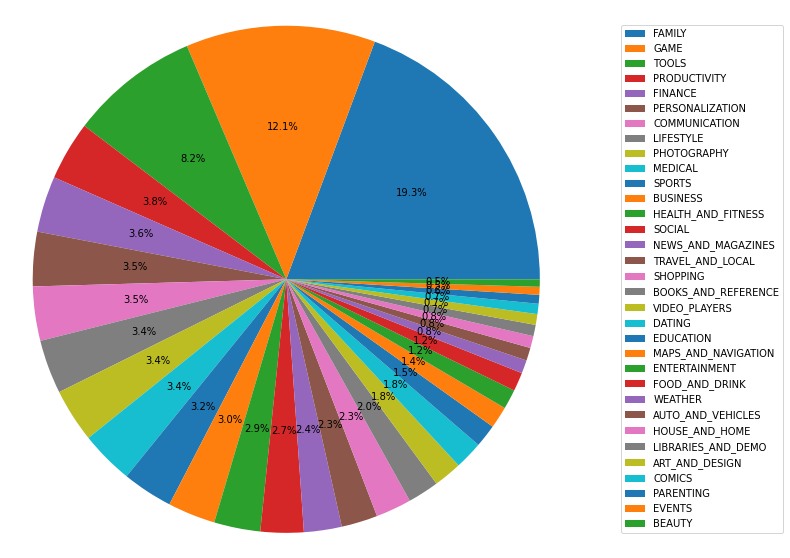

In [52]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
number_of_apps = plstr_df["Category"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.show()

# Above graph represents unique column of our Play Store App Dataset 

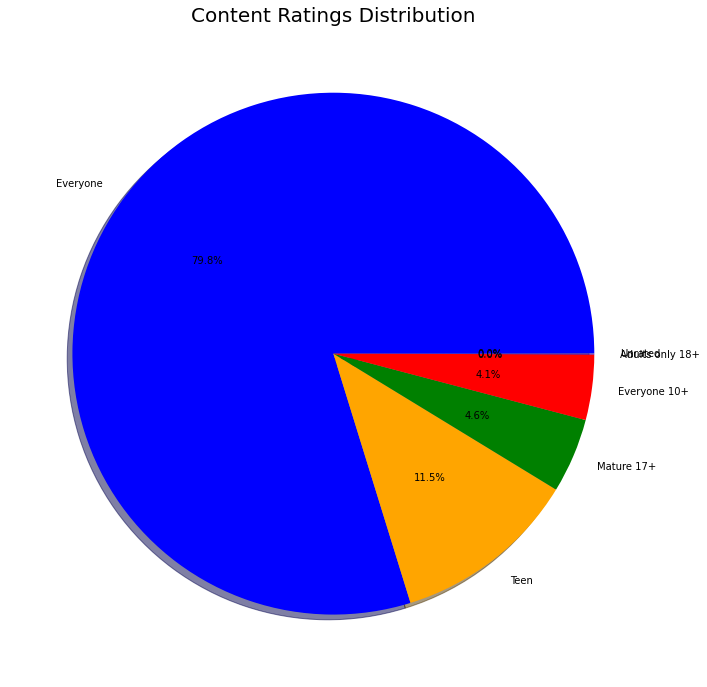

In [53]:
plt.figure(figsize=(12,12))
labels = plstr_df['Content Rating'].value_counts(sort = True).index
sizes = plstr_df['Content Rating'].value_counts(sort = True)
colors = ["blue","orange","green","red"]
#explode = (0.2,0)
plt.pie(sizes, explode=None, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Content Ratings Distribution',size = 20)
plt.show()

# Above graph shows that "Everyone" is the heighest Content Rating there. 

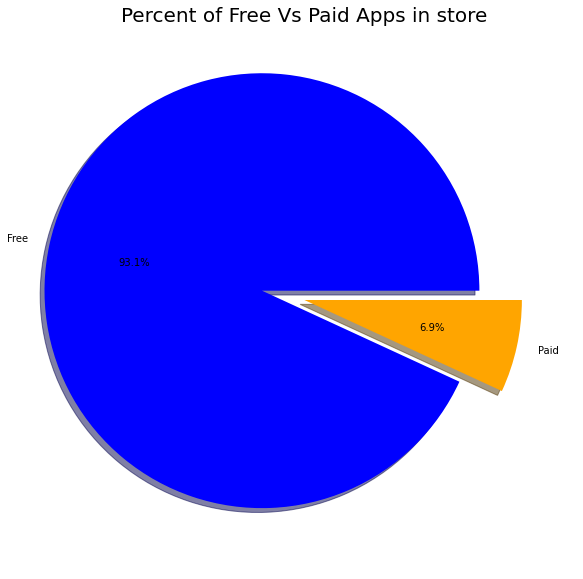

In [54]:
plt.figure(figsize=(10,10))
labels = plstr_df['Type'].value_counts(sort = True).index
sizes = plstr_df['Type'].value_counts(sort = True)
colors = ["blue","orange"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

# In The above graph we can see there is 93% of apps are free in the play store

In [55]:
grp=plstr_df.groupby('Category')
i=grp['Installs'].agg(np.mean)
p=grp['Price'].agg(np.mean)
r=grp['Reviews'].agg(np.mean)
s=grp['Size'].agg(np.mean)
print(i)
print(p)
print(r)
print(s)

Category
ART_AND_DESIGN         2.036526e+06
AUTO_AND_VEHICLES      7.278055e+05
BEAUTY                 6.408619e+05
BOOKS_AND_REFERENCE    1.082651e+07
BUSINESS               3.198215e+06
COMICS                 9.661397e+05
COMMUNICATION          7.867180e+07
DATING                 1.298883e+06
EDUCATION              4.138388e+06
ENTERTAINMENT          2.212306e+07
EVENTS                 3.544313e+05
FAMILY                 5.848038e+06
FINANCE                2.430008e+06
FOOD_AND_DRINK         2.431866e+06
GAME                   2.937045e+07
HEALTH_AND_FITNESS     5.194680e+06
HOUSE_AND_HOME         1.839441e+06
LIBRARIES_AND_DEMO     9.544219e+05
LIFESTYLE              1.753250e+06
MAPS_AND_NAVIGATION    5.840867e+06
MEDICAL                1.396115e+05
NEWS_AND_MAGAZINES     2.520145e+07
PARENTING              6.223222e+05
PERSONALIZATION        6.734876e+06
PHOTOGRAPHY            3.197777e+07
PRODUCTIVITY           3.731458e+07
SHOPPING               1.273927e+07
SOCIAL             

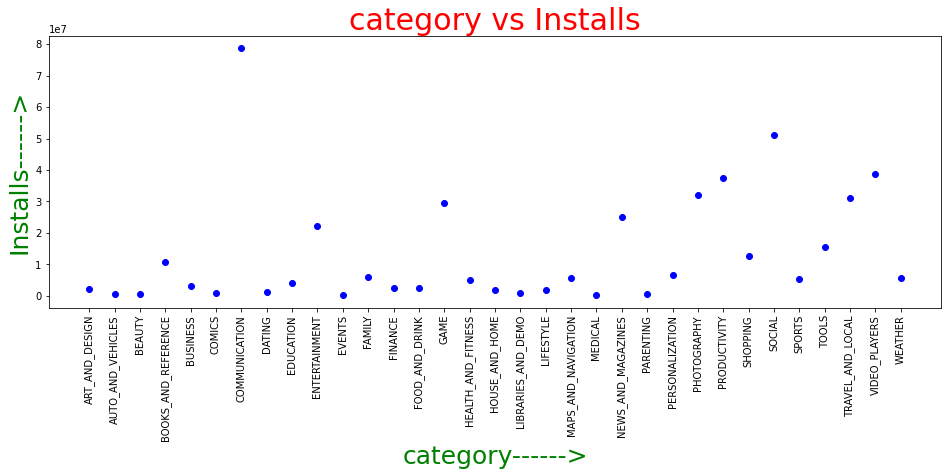

In [56]:
#lets see category vs installs
plt.figure(figsize=(16,5))
plt.plot(i,'ro',color='blue')
plt.xticks(rotation=90)
plt.title('category vs Installs',color = 'red',fontsize=30)
plt.xlabel('category------>',color = 'green',fontsize=25)
plt.ylabel('Installs------>',color = 'green',fontsize=25)
plt.show()

# In the above graph we can see that the heighest number of installs are of Communication category.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


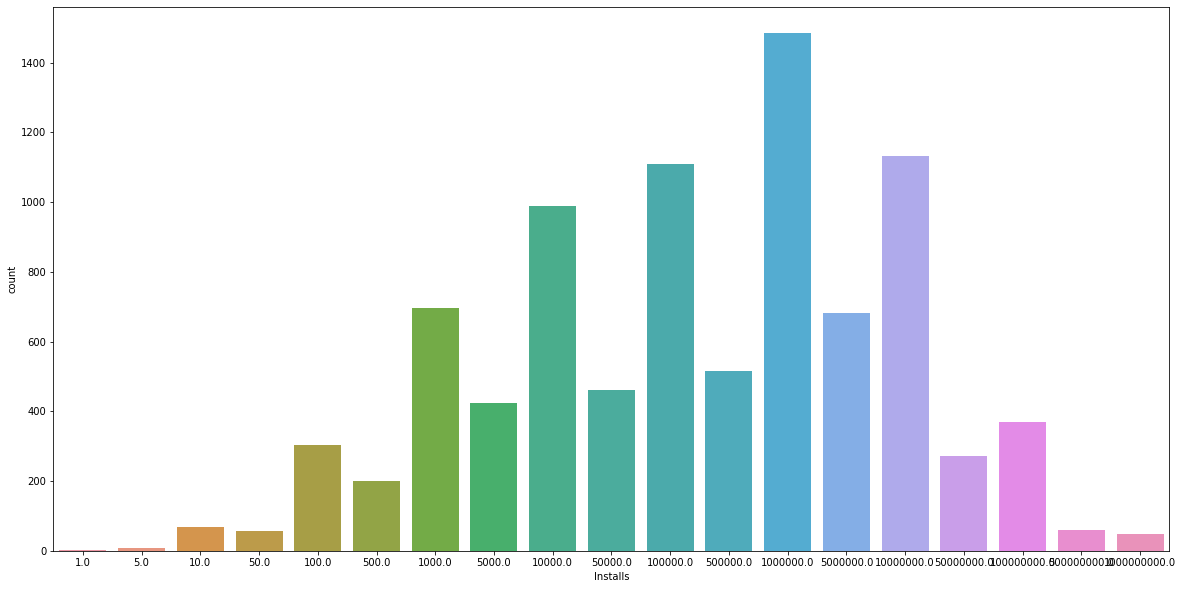

In [63]:
plt.figure(figsize=(20,10))
sns.countplot(plstr_df.Installs)

In [58]:
plstr_df.Installs.value_counts().sort_index()

1.000000e+00       3
5.000000e+00       9
1.000000e+01      69
5.000000e+01      56
1.000000e+02     303
5.000000e+02     199
1.000000e+03     697
5.000000e+03     425
1.000000e+04     988
5.000000e+04     461
1.000000e+05    1110
5.000000e+05     515
1.000000e+06    1485
5.000000e+06     683
1.000000e+07    1132
5.000000e+07     272
1.000000e+08     369
5.000000e+08      61
1.000000e+09      49
Name: Installs, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


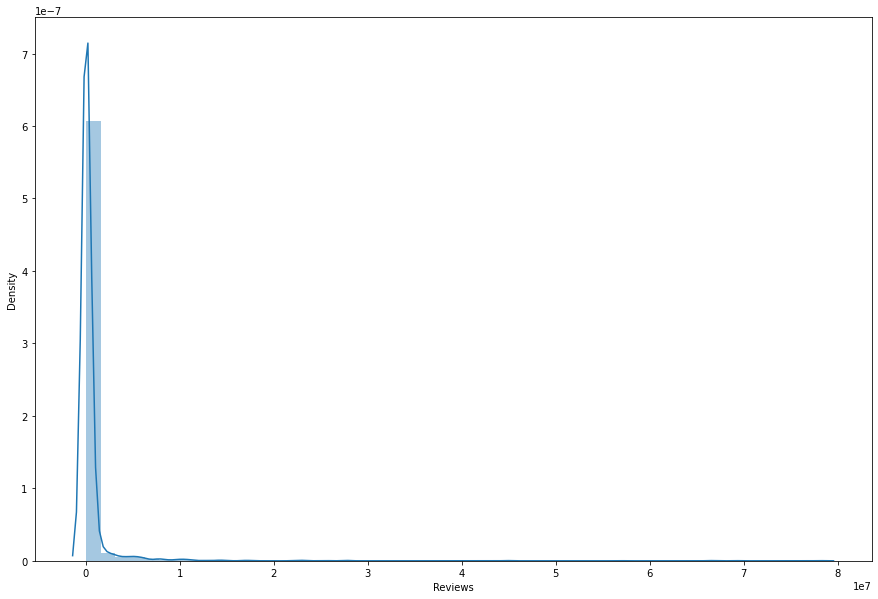

In [61]:
plt.figure(figsize=(15,10))
sns.distplot(plstr_df.Reviews)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


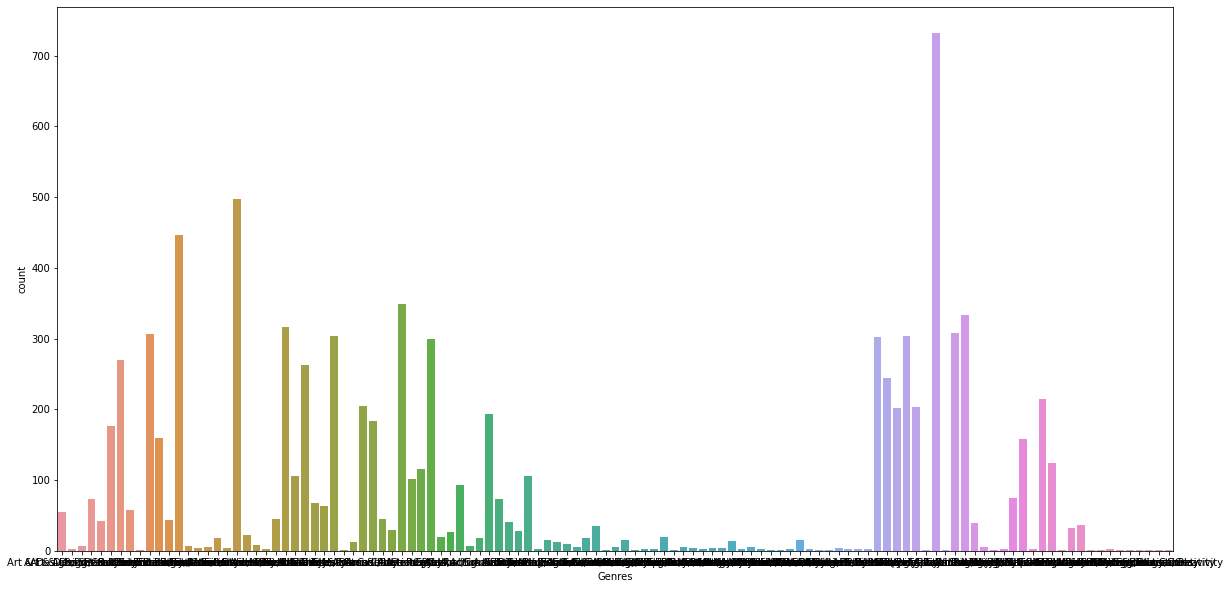

In [65]:
plt.figure(figsize=(20,10))
sns.countplot(plstr_df.Genres)

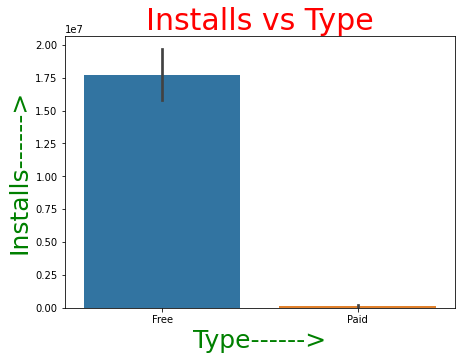

In [75]:
plt.figure(figsize=(7,5))
sns.barplot(x=plstr_df['Type'],y=plstr_df['Installs'])
plt.xticks(rotation=0)
plt.title('Installs vs Type',color = 'red',fontsize=30)
plt.xlabel('Type------>',color = 'green',fontsize=25)
plt.ylabel('Installs------>',color = 'green',fontsize=25)
plt.show()

# In the above graph, heighest no. of installs are of "free" Type. 

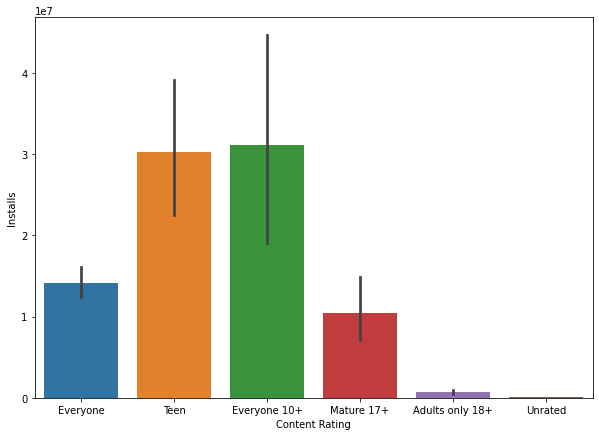

In [84]:
plt.figure(figsize=(10,7))
sns.barplot(x=plstr_df['Content Rating'],y=plstr_df['Installs'])

# As we can see in the above graph, "Everyone 10+" is the most installed Content Rating.